# Введение в искусственные нейронные сети
# Урок 1. Основы обучения нейронных сетей

## Содержание методического пособия:


- [Общие сведения о искусственных нейронных сетях](#intro)
- [Место искусственных нейронных сетей в современном мире](#place)
- [История искусственных нейронных сетей](#history)
- [Строение биологической нейронной сети](#bio)
- [Общие сведения о том, как происходит обучение нейронных сетей](#train)
- [Инициализация весов. Функции активации](#init)
- [Обратное распространение ошибки и градиентный спуск](#backprop)
- [Небольшой пример по обучению простой нейронной сети](#example)
    - [Нейрон для повторения входа](#repeat)
    - [Нейрон для регрессии](#reg)
    - [Нейрон для многоклассовой классификации](#multiclass)
- [Пример построения двухслойной нейронной сети на numpy](#example2)
- [Домашнее задание](#hw)
- [Определения](#def)

## Общие сведения об искусственных нейронных сетях <a class='anchor' id='intro'>

В даннном разделе мы узнаем, что такое нейронные сети и из каких компонентов они состоят.

Искусственнная нейронная сеть - это программная реализация математической модели биологической нейронной сети. Ее цель — извлечь пользу из переданных ей данных. Например, сказать, что на фотографии или сделать какой-либо прогноз.

Нейронные сети состоят из входных, внутренних и внешних слоев. Внутренние слои ответственны за обучение. Входные слои позволяют ввести данные во внутренние слои, а внешние слои позволяют вывести полезный вывод из данных. Сами слои состоят из отдельных нейронов, которые связаны с другими нейронами и по определенным алгоритмам способны усиливать с ними связь.

Через нейронные сети в процессе обучения многократно пропускают какие-либо данные, например изображения и указывают, что на них. За счет работы различных алгоритмов в нейронной сети вырабатывается такая система связей между нейронами, которая позволяет в последствии при переданных ей новых данных получить ответ, что на фотографии.

Но распознавание объектов на фотографиях далеко не единственная сфера применения нейронных сетей. Существует множество видов различных нейронных сетей для разных задач. Основные из этих видов мы разберем в данном курсе. Детальное рассмотрение процесса обучения нейронной сети и базовые сведения об ее архитекутуре будут разобраны во второй половине данного методического пособия.

<img src='https://drive.google.com/uc?id=1RgW2rlqVFGNePU8RUiEGBfA4G5_tTqsb'>

## Место искусственных нейронных сетей в современном мире <a class='anchor' id='place'>

В данном разделе мы разберем какие новшества принесли искусственные нейронные сети в современный мир. Долгое время создание искусственого интеллекта оставалось частью научной фантастики и несмотря на многие предсказания прошлого времени, что искусственный интеллект вот-вот будет создан,  искусственный интеллект был создан совсем не давно. По крайней мере люди стали говорить, что они пользуются искусственным интеллектом. Как минимум можно сказать, что искусственный интеллект создан с маркетинговой точки зрения. Тем не менее сейчас мы можем говорить только лишь о том, что создан специализированный искусственный интеллект, способный выполнять только определенные задачи, которые раньше было свойственно выполнять только человеку. Т.е. создан так называемый **узкий искусственный интеллект**. Создание **общего искусственного интеллекта**, т. е. программы, которая могла бы мыслить как человек, по прежнему остается фантастикой.

<table><tr>
<td> <img src='https://drive.google.com/uc?export=view&id=1uASIANBhuWuRP58bgs4nytR6nTtbewhM'> </td>
<td> <img src='https://drive.google.com/uc?export=view&id=1hKXauR0O5jD5S9TnoCWX63KQvd_JbspA' style="width: 600px;"> </td>
</tr></table>

Искусственные нейронные сети, которые являются предметом изучения данного курса являются основой революции в области «узкого искусственного интеллекта» и являются одной из главных надежд для создания общего искусственного интеллекта в будущем. Однако искусственвенный интеллект может строиться не только на базе искусственных нейронных сетей. Более того как мы увидем в разделе посвященным истории, данных подход долгое время считался неперспективным. Так почему же революция совершена именно благодаря им, а не другим подходам? Дело в том, что компьютерные программы давно могут автоматизировать различную работу человека. Им можно дать определенный алгоритм работы и они будут его надежно выполнять. Программы как известно получают на вход данные, обрабатывают их с помощью определенного алгоритма и на выходе опять выдают данные.
Но возьмем к примеру завод. На нем есть много труда, который можно было автоматизировать. Не трудно составить алгоритм, например, для промышленного манипулятора, который будет переносить определенные тяжелые предметы. С помощью технологий перевода данных обработанных процессором в движения манипулятора можно заставить его совершить определенную полезное работу. Но как ввести данные для обработки? Как дать понять манипулятору какой предмет ему нужно взять? Здесь на помощь может прийти камера.

<img src='https://drive.google.com/uc?id=11oiOY9BICo__bqmhJkJ5RlkJVbfN4z5U'>

Долгое время различные алгоритмы компьютерного зрения справлялись с определенными несложными задачами наподобее определения предметов через цвет или его геометрическую форму.
Но что если нужно работать с предметами разного цвета и формы, но объеденных другими общими свойствами? Например сортировать яблоки и груши. Они могут быть разной формы и цвета, но тем не менее нужно отделить одно от другого. Человеку не трудно справиться с подобной задачей но для искусственного интеллекта долгое время это оставалось не посильной задачей. Однако с применением глубоких искусственных нейронных сетей начиная с 2012 года выполнение этой задачи стало реальностью. Но не только в сфере распознования образов важную роль сыграли нейронные сети. Также в сфере распознования речи. Так же сейчас есть нейронные сети которые могут создавать изображения и синтезировать голос. Также они применяются в многих других сферах.

Подобный переворот случился благодаря тому, что нейронные сети стали повторять собою нейронные сети человеческого мозга, который как раз может легко справляться с подобной задачей.

## Применение нейронных сетей  <a class='anchor' id='usage'>

В нашем курсе мы будем проходить различные виды нейронных сетей и будем рассматривать в соотвествующих уроках применение каждого вида отдельно. Здесь же в общих чертах нарисуем картину их применения.

Нейронные сети применяются в области **компьютерного зрения**. Начиная с обычных программ распознающих предметы в производстве или распознавание личности на телефоне, заканчивая крупными комплексами компьютерного зрения, которые применяются в беспилотных автомобилях.

<table><tr>
    <td><h3>Распознавание лица</h3><img src='https://drive.google.com/uc?export=view&id=1eVT_BJ-FlU_zF7uBkf9rDC4Cebv-H2M_' width=600>
        </td>
    <td><h3>Беспилотные автомобили</h3>
        <img src='https://drive.google.com/uc?export=view&id=1iW_oqruyLDRnvNoA6PcUBmzbjnZwlntd'>
        </td>
</tr></table>

Комбинация из нескольких нейронных сетей позволяет описать содержание фотографии.
Нейронные сети применяются в медицине — для анализа снимков и заключений о болезни человека в некоторых областях лучше, чем человек.

Нейронные сети также применяются для анализа поведения покупателей, а также на бирже. Находят они применения также в прогнозах погоды.

<table><tr>

<td><h3>Анализ поведения покупателей</h3>
<img src='https://drive.google.com/uc?export=view&id=1iDISC_aqPS2x-OS534s8J9cYXCNV9ZIj'></td>
<td><h3>Сегментация клеток в медицине</h3>
    <img src='https://drive.google.com/uc?export=view&id=1XRxNqtW7AUcGuZqAOV3wcO1Kryb5Cooi'>
        </td>
</tr></table>

Нейронные сети находят также применение для творчества. Уже сейчас есть художники, которые продают картины, которые рисуют нейронные сети.

Есть и другие интересные области применения нейронных сетей. Например они используются для придания цвета старым фотографиям или фильмам. В улучшении качества изображений. Для чтения по губам. Для генерации фотографий и много другого.

Нейронные сети применяются для **распознавания голоса** — Siri, Google помощник, Alexa, Алиса и прочие голосовые помощники распознают голос человек с помощью нейронных сетей. Их применение не ограничивается только лишь распознаванием голоса. В последние годы достигнут существенный прогресс в синтезе голоса. Применяются они также в области машинного перевода. Прогресс в этой области как раз связан с ними.

##  <a class='anchor' id='history'>История искусственных нейронных сетей</a>


Представление о нейронных сетях как главном способе создания искусственного интеллекта сложилось далеко не сразу и в данном разделе мы осветим основные вехи этой технологии.

Математическую модель искусственного нейрона была предложена У. Маккалоком и У. Питтсом  в 50-х годах 20 века.

В виде компьютерной системы нейронная сеть была впервые реализована  Фрэнком Розенблаттом в 1960 году. Фрэнк Розенблат создал «Марк-1», который являлся программно-аппаратным комлексом и воплащал в себе простую нейронную сеть в один слой. Можно отметить, что современные сети включают в себя 50 — 150 слоев, а экспериментальные достигают размера более 1000 слоев.

Однако волна энтузиазма 60-х годов в отношении искусственных нейронных сетей сменилась скепсисом в отношении них из-за трудностей в совершении определенных логических операций и невозможности получать практические результаты. Доминирующим подходом для создания искусственного интеллекта стали экспертные системы. Они являлись по сути продвинутой энциклопедией знаний в той или иной сфере.

Однако в 2012 г. появились глубокие нейронные сети. Т.е. сети с количеством внутренних слоев больше одного. Сначала кол-во слоев таких нейронных сетях было примерно 3-10. Но в силу эффективности подхода по увеличению кол-ва слоев, быстро появились нейронные сети кол-во слоев которых стало исчисляться десятками.


<img src='https://drive.google.com/uc?export=view&id=1cHOT6sfmhHi9cTsIz-bMIyYr6tZNfAf4' width=1100px>

Именно с 2012 г. нейросети стали считаться доминирующим способом в решении многих задач искусственного интеллекта. Стоит задаться вопросом: почему именно в этот период? Прорыв был обеспечен более продвинутой архитектурой, возросшими количеством хранимых компьютерами данных для тренировки нейронных сетей, а также возросшей вычислительной мощностью компьютеров. Также можно отметить появления в эту пору возможности использовать видеокарты (GPU) для тренировки нейронных сетей, которые оказались лучше приспособленными для решения этих задач чем классические CPU.

 <table>
   <tr>
    <td rowspan="2"><img src='https://drive.google.com/uc?export=view&id=1AV8Jz_MhXy0x_BUE6CyuA4Hu63RWaoUN' width=1500></td>
    <th colspan="2"><img src='https://drive.google.com/uc?export=view&id=1Zv_5TDpHp-A98ZrxJval42s_dgZwsUFb'></th>

   </tr>
      <tr align="center">
    <td><img src='https://drive.google.com/uc?export=view&id=1aPfCx4zwHgNbNnoZh-PCJpjIt9URTjrz'></td>
   </tr>
  </table>

## Строение биологической нейронной сети <a class='anchor' id='bio'>

Термин «Нейрон» был  введен Г. В. Вальдейером в 1891 г. Что из себя предствляет человечекий нейрон? Часто можно услышать его сравнение с транизистором. Однаком более убедительным является точка зрения нейрофизиологов утверждающих, что нейрон это полноценный компьютер. Человеческий нейрон также как и компьютер призван обрабатывать сигналы.
То, что человеческое сознание является результатом работы нейронов было впервые отмечено в работах Александра Бейна (1873) и Уильяма Джеймса (1890). В работах Бейна впервые акт запоминания был сформулирован как акт укрепление нейронных связей.

В нейронах мозга есть аксоны, через которые в него попадают сигналы,  у искусственных нейронов также есть подобные входы. У нейронов мозга есть выходной компонент дендрит и искуственных нейронов также есть выходные компоненты. У нейронов человеческого мозга насчитывается порядка 10 000 связей с другими нейронами у искусственных нейронов их также может быть много. И биологической нейронной сети и в искусственной в случае если сумма поступающих сигналов в нейрон превышает определенный порог то сигнал передается следующему нейрону.


<img src='https://drive.google.com/uc?export=view&id=1ETe3FLpW_YeBFzSXee7qJWUQ1ju91vV8' width=800px>

Искусственные нейронные сети работают подобно биологическим — через них пропускаются данные и те связи, которые ведут к нужным результатам укрепляются. Но если в человеческом мозге происходит засчет утолщения этих связей, то в программных нейронных сетях это происходит за счет увеличение чисел символизирующих эти связи.


<img src='https://drive.google.com/uc?export=view&id=1RdXFm7HGZKhgNor3099il9_MudFM7WoY'>

<img src='https://drive.google.com/uc?export=view&id=1xchAwxcsAg8JnKRZ4vzCRlefiDwDeU3m'>

In [2]:
(6 + 3) + (3 + 1)

13

## Общие сведения о том, как происходит обучение нейронных сетей <a class='anchor' id='train'>

Давайте возьмем какую-нибудь типичную задачу для нейросети и попробуем разобрать как она могла бы ее решить. В качества примера задачи можем взять типичный пример — определить на фотографии находится кот или собака.

Сначала давайте подумаем как это данная задача решалась бы без нейронной сети. Вспомним, что фотография это набор пикселей. Пиксели в компьютере репрезентуются матрицей чисел. У кота очень много отличительных черт как и у собаки. Перечесление этих уникальных свойств займет долгое время. Но стоит учесть вот какое обстоятельство - усики и лапки и шерстка есть у многих животных. И скорее всего все что нам остается делать это описывать размеры этих усиков, лапок и т. д. Изучать их угла наклона и т. д. Попытки делать это вручную были, как раз до эпохи нейронных сетей. Но результаты были не высокие. Как вы понимаете объем признаков слишком большой.

<img src='https://drive.google.com/uc?export=view&id=1ELlQJBZrmg_qcQBnawkH1KjI2GajZqkk' width=500px>

Таким образом задача нейронной сети содержать в себе необходимый набор признаков которые позволяет ей отличить один объект от другого.
Но встает вопрос как поместить в нейронную сеть необходимый набор признаков? Ответ на этот вопрос будет даваться в течении всего данного курса и всеравно не будет исчерпывающим. Поскольку для это придется обучать нейронную сеть, а ее обучение порой преобретает характер искусства нежели набор предписаний.
Тем не менее в процессе обучения всегда нужно пройти ряд этапов, которые будут общими для любого процесса обучения.


Нам определиться с архитектурой нейронной сети. От удачно выбранной архитектуры будет зависеть насколько быстро мы сможем обучить нейронную сеть, насколько точной она будет, а также сможем ли мы ее обучить в принципе.
Архитектура нейронной сети как вы догадываетесь зависит от задачи. В зависимости от задачи нам нужно будет выбрать:

- Количество слоев из которых будет состоять нейронная сеть
- Сколько будет нейронов в этих слоях


Кроме этого нам нужно будет подобрать верным образом компоненты, за счет которых будет обучаться нейронная сеть (подробнее о них можно будет узнать в следующих разделах данного мет. пособия)

- Систему инициализации весов нейронов
- Функцию активации нейронов
- Алгоритм корректировки весов нейронов

Это безусловно список самых общих компонентов с которыми нам нужно будет определиться, но на данной стадии обучения надо полагать нам их будет достаточно.
Архитектуры нейронных сетей мы будем изучать на отдельных уроках этого курса. В этом же уроке мы разберем следующие неотъемлимые компоненты обучения нейронной сети любой архитектуры — инициализация весов, их корректировка, рассмотрим виды функций активации весов нейронной сети, разберем, что такое градиентный спуск и метод обратного распространения ошибки.

## Инициализация весов. Функции активации <a class='anchor' id='init'>

In [3]:
0.8 + 0.2

1.0

<img src='https://drive.google.com/uc?export=view&id=1XmympDj-QuN6VBWDGM69rzJHxB3-kBCX'>

Мы с вами выяснили, что в процессе обучения нейронной сети в ней должны вырабататься признаки по которым она сможет определять, что на фотографии. Но как эти признаки будут репрезентованы в нейронной сети? Все эти признаки будут составлять определенную сложную матрицу чисел. Настолько сложную, что человеку не под силу ее проанализировать. Какие это будут признаки? Это тоже неизвестно. Их может быть так много и они могут быть такими специфическими, что и описать их будет трудно. Для этого и нужны нейросети, они берут на себя содержание и описание в себе этих признаков.

Однако все эти признаки записываются через систему весов нейронов. Веса нейрона отражают толщину связи этого нейрона с др. нейроном. Из совокупности  этих связей и состоят признаки. Т.е. другими словами обучить нейронную сеть значит найти нужные веса для ее нейронов.

Первоначально веса можно задать случайными числами. И в процессе обучения они будут все больше и больше подходить под решения задачи. Программно это можно показать на примере следующего фрагмента кода.

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((3, 1))

weights

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04]])

Но мало просто присвоить определенные веса нейронам. Необходимо также определить функцию по которой будет активироваться нейроны. Выбранная функция активация будет одинаковой для всех нейронов. С помощью нее можно определять с какой силой нужно подействовать на нейрон, чтобы он  активировался и передал сигнал дальше.

$$Y = \sum{weights * X} + bias$$

Выше показан нейрон в виде формулы. Активация его как говорилась зависит от входных данных, его весов и некоего порогого значения.

Функций таких существует очень много - сигмоида, линейная, ступенчатая, ReLU, tahn и т. д.

<img src='https://drive.google.com/uc?export=view&id=1jFJKMuRoaYExj5-lG-UXJ64wlFpo6RDB'>

В данном фрагменте кода мы можем посмотреть как программно реализовать функцию сигмоид -

In [5]:
# вычисление сигмоид функции

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

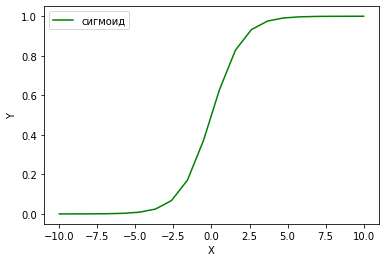

In [6]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 20)
Y = sigmoid(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

А вот, как например на Python, можно реализовать упомянутую выше функцию активации Relu -

In [7]:
# вычисление Relu функции

def ReLU(x):
    return x * (x > 0)

In [8]:
def ReLU_deriv(x):
    return 1 if x >= 0 else 0

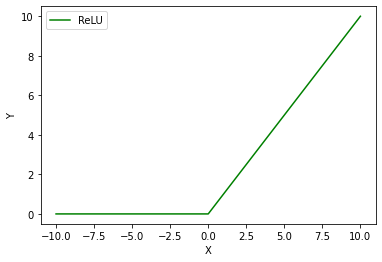

In [9]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 21)
Y = ReLU(X)

plt.plot(X, Y, '-g', label='ReLU')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Обратное распространение ошибки и градиентный спуск <a class='anchor' id='backprop'>

Давайте прежде чем начнем разбирать обратное распространение и градиентный спуск, скажем несколько слов о тех типах архитектур нейронной сети, которые будут использованы в данном уроке. Это простые нейронные сети. С точки зрения архитектуры их можно отнести к полносвязным нейронным сетям так как все нейроны связаны между собой. С другой стороны их можно отнести к нейронным сетям прямого распространения (feed forward). Сети прямого распространения подразумевает распространения сигналы от вход к выходу, в отличии от реккурентных нейронных сетей, где во внутренних слоях сигналы могут ходить по циклу. О плюсах и минусах сетей полносвязных мы поговорим в уроке посвященном Сверточным нейронным сетям, поскольку данные нейронные сети отошли от этого подхода и нам нужно будет выяснить почему.

После того как на выходе нейронной сети мы получили определенное цифровое значение нам нужно сравнить его с искомым. Мы можем посчитать насколько в количественом выражение ошиблась нейросеть. Задача обратного распространения ошибки пройтись от выхода ко входу и скорректировать веса нейронов. Это процесс происходит множество раз в процесс обучения.

<img src='https://drive.google.com/uc?export=view&id=1XmympDj-QuN6VBWDGM69rzJHxB3-kBCX'>

Можно сказать что процесс обучения нейронной сети это попытка оптимизировать веса нейронной сети до тех пор пока не будет достигнута минимальная степень ошибки. Для этого хорошо подходит такой алгоритм как градиентный спуск. Суть данного метода заключается в том, чтобы искать такие числовые параметры, при которых значение ошибки достигнет нуля.

Обратите внимание на следующий график, из него видно, что есть определенное число по шкале весов, которому соотсвествует минимальное значение по шкале Error. Это число и нужно находить в процессе обучения нейронных сетей.

<img src='https://drive.google.com/uc?export=view&id=1bLmRgk-GiWyD3NKMIiAsIBUO-2uDkIW6'>

1. Инициализация w

2. Цикл по k = 1,2,3,...:

- $ w^{k} = w^{k-1} - \eta\nabla Q(w^{k-1}, X) $

- Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Давайте попробуем реализовать программного градиентный спуск, чтобы лучше понять как он работает.

x**1/2 = 1/2x ** -1/2

In [10]:
# первоначальное точка
start_point = 5

# размер шага (learning rate)
learning_rate = 0.1

# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

func = lambda x: 2 * x ** 2
# функция градиента для y = 2 * X**2
gr_func = lambda x: 4 * x

# для картинки
D = 5

X = np.linspace(-D, +D, 20)
Y = func(X)

# начальная точка
next_point = start_point

n_iter = 0

x = []
x.append(next_point)

Итерация: 1
Текущая точка 5| Следующаяя точка 3.0
--------------------------------------------------------
Итерация: 2
Текущая точка 3.0| Следующаяя точка 1.7999999999999998
--------------------------------------------------------
Итерация: 3
Текущая точка 1.7999999999999998| Следующаяя точка 1.0799999999999998
--------------------------------------------------------
Итерация: 4
Текущая точка 1.0799999999999998| Следующаяя точка 0.6479999999999999
--------------------------------------------------------
Итерация: 5
Текущая точка 0.6479999999999999| Следующаяя точка 0.3887999999999999
--------------------------------------------------------
Итерация: 6
Текущая точка 0.3887999999999999| Следующаяя точка 0.23327999999999993
--------------------------------------------------------
Итерация: 7
Текущая точка 0.23327999999999993| Следующаяя точка 0.13996799999999995
--------------------------------------------------------
Итерация: 8
Текущая точка 0.13996799999999995| Следующаяя точка 0.08398

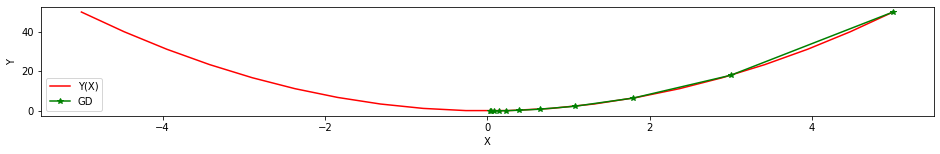

In [11]:
plt.figure(figsize=(16, 2))
plt.plot(X, Y, 'r', label='Y(X)')

# количество итерация
n = 10
for i in range(n):
    current_point = next_point

    # движение в негативную сторону вычисляемого градиента
    next_point = current_point - learning_rate * gr_func(current_point)
    x.append(next_point)
    # print(next_point)

    n_iter += 1

    # остановка когда достигнута необходимая степень точности
    print(f"Итерация: {n_iter}")
    print(f"Текущая точка {current_point}| Следующаяя точка {next_point}")
    print("--------------------------------------------------------")


    if (abs(current_point - next_point) <= eps):
        break

print(f"минимум {next_point}, количество затраченных итераций: {n_iter}")
X_grad = np.array(x)
plt.plot(X_grad, func(X_grad), '-*g', label = 'GD')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Метод обратного распространения ошибки (backpropagation)

<img src='https://drive.google.com/uc?export=view&id=1HyKXUNjUD80-Wk458JW7ZCqgH0HhX6-m'>

## Небольшой пример по обучению простой нейронной сети <a class='anchor' id='example'>


Рассмотрим создание простой нейронной сети. Данная нейронная сеть будет обучаться предсказывать 3 число на основании первых двух. Для этого мы ей передадим обучающую набор данных из двух последовательностей чисел.

Этот пример позволяет создать и запустить простейшую нейронную сеть, но уже  в этом примере присутсвуют все необходимые атрибуты создания нейронных сетей:
- подготовка данных для обучения модели
- конфигурация модели
- запуск модели.

Дальше мы разберем, что такое функция активации, обратное распространение, внутренние слои нейронной сети и прочие аспекты создания нейронных сетей.
Обратите внимание, что здесь используется библиотека numpy для получения дополнительных команд при работе с массивами.

### Нейрон для повторения входа <a class='anchor' id='repeat'>

**Производная сигмоиды**

$$\sigma(z) = \frac{1}{1 + exp(-z)}$$

$$\frac{d\sigma(z)}{dz} = -\frac{1}{(1 + exp(-z))^2}(-exp(-z)) = \frac{exp(-z)}{(1 + exp(-z))^2} \text{(*)} = \frac{1}{1 + exp(-z)}(1-\frac{1}{1 + exp(-z)}) = \sigma(1-\sigma)$$

$ (*)\frac{exp(-z) +1-1}{(1 + exp(-z))^2} = \frac{1 + exp(-z) -1}{(1 + exp(-z))^2}= \frac{1 + exp(-z)}{(1 + exp(-z))^2} - \frac{1}{(1 + exp(-z))^2}=$

$ = \frac{1}{(1 + exp(-z))} - \frac{1}{(1 + exp(-z))}\frac{1}{(1 + exp(-z))} = \frac{1}{(1 + exp(-z))}(1- \frac{1}{(1 + exp(-z))}) $

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

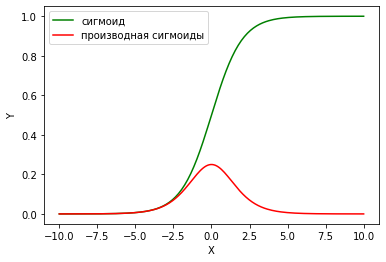

In [13]:
# для картинки
D  = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
Y_deriv = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, Y_deriv, '-r', label='производная сигмоиды')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
# создание данных для обучения
X = np.array([[1]])
y = np.array([[1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

forward

In [76]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
output, pred

(array([[4.53004473]]), array([[0.98933478]]))

In [75]:
bias, weights

(array([[2.41667361]]), array([[2.11337112]]))

In [22]:
# ошибка
(y - pred) ** 2

array([[0.05895567]])

Backward

[Ссылка](https://docs.google.com/presentation/d/1Sfj8l91QFkFA6kMCe4CStCRDH5-pmfnZc8AEe8ujudg/edit?usp=sharing) на презентацию.

**dL/dL**

$\frac{dL}{dL} = 1$

**dL/dsigma**

$Loss = (y - \sigma)^2$

<h3>$\frac{dL}{\sigma} = \frac{dL}{dL}\frac{dL}{d\sigma} = 2 * (\sigma - y) = 2 *(0.757 - 1) = -0.484$</h3>


**dL/db**

$y_{pred} = \sigma(output)$

<h3>$\frac{dL}{db} = \frac{dL}{d\sigma}\frac{d\sigma}{db} = -0.484 * (0.757 * (1-0.757)) = -0.089$</h3>

**dL/da**

$b = w_0 + a$

<h3>$\frac{dL}{da} = \frac{dL}{db}\frac{db}{da} = -0.089 * 1$</h3>

**dL/dw0**

$b = w_0 + a$

<h3>$\frac{dL}{dw_0} = \frac{dL}{db}\frac{db}{dw_0} = -0.089 * 1$</h3>

**dL/dw1**

$a = w_1*x$

<h3>$\frac{dL}{dw_1} = \frac{dL}{da}\frac{da}{dw_1} = -0.089 * x = -0.089 * 1$</h3>



In [72]:
# сделаем backprop
# dloss/dloss = 1
dsigm = 2 * (pred - y)
dsigm
db = dsigm * sigmoid_deriv(output)
db
da = 1 * db
da
dw0 = 1 * db

dw1 = da * X
dw0, dw1

(array([[-0.08928153]]), array([[-0.08928153]]))

In [73]:
# обновим параметры
bias -= dw0
weights -= dw1

In [74]:

sigmoid(np.dot(X, weights) + bias)

array([[0.98933478]])

#### Обучение на большем количестве объектов

In [19]:
# создание данных для обучения
X = np.array([[0], [1]])
y = np.array([[0, 1]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))

display(weights, bias)

array([[0.417022]])

array([[0.72032449]])

Forward

In [20]:
# сделаем предсказание
output = X * weights + bias
pred = sigmoid(output)
pred

array([[0.67267847],
       [0.75719212]])

In [21]:
# ошибка
np.mean((y - pred) ** 2)

0.2557259944893541

Backward

In [22]:
# сделаем backprop
# dloss/dloss = 1
dsigm = 2 * (pred - y)
print(dsigm)
db = dsigm * sigmoid_deriv(output)
print(db)
da = 1 * db
print(da)
dw0 = np.ones((X.shape[0])) @ db
print(dw0)
dw1 = np.ones((X.shape[0])) @ (da * X)
# dw1 = da.T @ X
print(dw1)

[[ 1.34535694]
 [-0.48561576]]
[[ 0.29622358]
 [-0.08928153]]
[[ 0.29622358]
 [-0.08928153]]
[0.20694205]
[-0.08928153]


In [23]:
# обновим параметры
bias -= dw0
weights -= dw1

In [24]:
# сделаем предсказания
sigmoid(np.dot(X, weights) + bias)

array([[0.62559906],
       [0.73491143]])

In [25]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y

        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))
        grad_bias = np.sum(error * sigmoid_deriv(output), keepdims=1)
        weights -= grad
        bias -= grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights) + bias)
    return output

In [26]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети
train_nn(X, y, 1000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[8.94869445]] [[-4.38767636]]


In [27]:
user_inp1, user_inp2 = 0, 1
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 0 1
Предсказание нейронной сети: 
[[0.01227698]
 [0.98965669]]


### Нейрон для регрессии <a class='anchor' id='reg'>

In [28]:
# вычисление ReLU функции

def ReLU(x):
    return x * (x > 0)

In [29]:
def ReLU_deriv(x):
    return np.where(x >= 0, 1, 0)

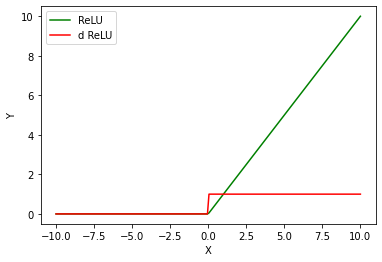

In [30]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = ReLU(X)
dY = ReLU_deriv(X)

plt.plot(X, Y, '-g', label='ReLU')
plt.plot(X, dY, '-r', label='d ReLU')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [31]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights, bias
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y

        # выполнение корректировки весов
        grad = np.dot(X.T, error * ReLU_deriv(output))
        grad_bias = np.sum(error * ReLU_deriv(output), keepdims=1)
        weights -= 0.01 * grad
        bias -= 0.01 * grad_bias


# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights, bias
    inputs = inputs.astype(float)
    output = ReLU(np.dot(inputs, weights) + bias)
    return output

In [32]:
# создание данных для обучения
X = np.array([[1], [3], [2], [4], [7]])
y = np.array([[3, 9, 6, 12, 21]]).T

# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X.shape[1], 1))
bias = np.random.random((1, 1))
print("веса до обучения: ")
print(weights, bias)

# запуск тренировки нейронной сети
train_nn(X, y, 10000)
print("веса после завершения обучения: ")
print(weights, bias)

веса до обучения: 
[[0.417022]] [[0.72032449]]
веса после завершения обучения: 
[[3.]] [[3.10711067e-15]]


In [33]:
user_inp1, user_inp2 = 5, 9
print(f"Проверка на новых данных: {user_inp1} {user_inp2}")
print("Предсказание нейронной сети: ")
print(run_nn(np.array([[user_inp1], [user_inp2]])))

Проверка на новых данных: 5 9
Предсказание нейронной сети: 
[[15.]
 [27.]]


### Нейрон для многоклассовой классификации <a class='acnhor' id='multiclass'>

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

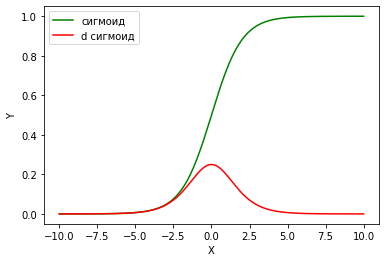

In [35]:
# для картинки
D = 10

X = np.linspace(0-D, 0+D, 200)
Y = sigmoid(X)
dY = sigmoid_deriv(X)

plt.plot(X, Y, '-g', label='сигмоид')
plt.plot(X, dY, '-r', label='d сигмоид')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(1797, 64)


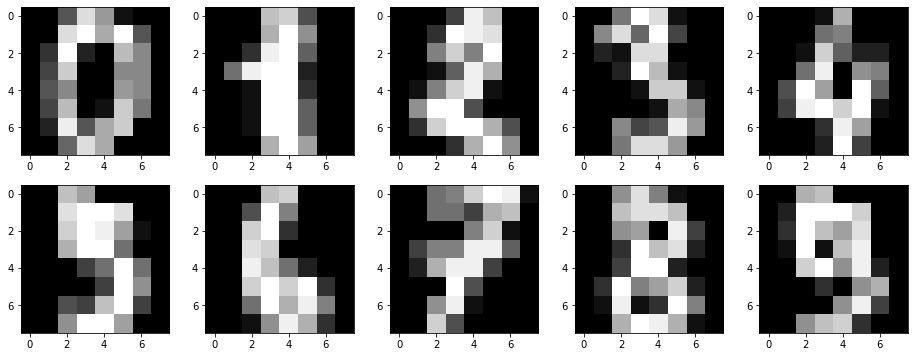

In [36]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [37]:
y.shape

(1797,)

In [38]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [39]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [40]:
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [41]:
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [42]:
# тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y

        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad


        error = np.mean(np.abs(error))
        errors.append(error)

        # получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [43]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

In [44]:
weights.size

640

Пример нашей нейронной сети


<img src="https://drive.google.com/uc?id=1WVFYOM5vIl8ooYzyB5kFhBrRLc4su7_K" width=200px />

In [45]:
# запуск тренировки нейронной сети
epochs = 20
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
2


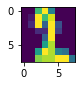

In [46]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

In [47]:
run_nn(X_test[ind])

array([0.00141616, 0.13769793, 0.93216512, 0.02312001, 0.00229921,
       0.02337297, 0.00431845, 0.00625284, 0.06007353, 0.01673659])

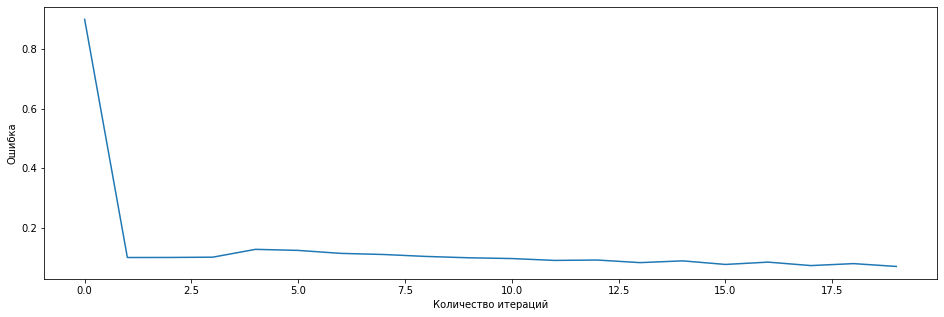

In [48]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Количество итераций')
plt.ylabel('Ошибка')
plt.show()

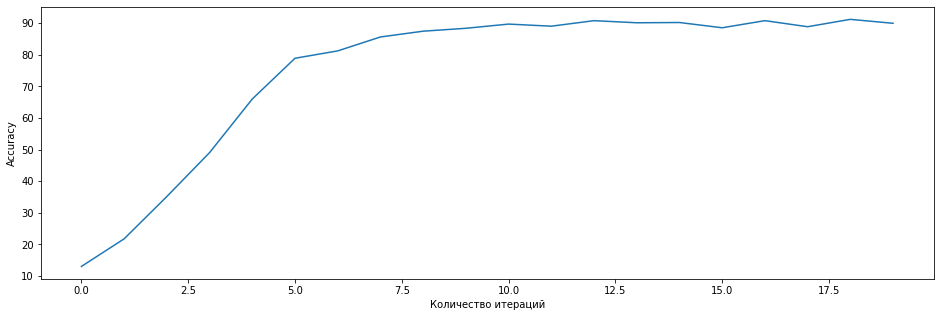

In [49]:
plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [50]:
test_preds = np.argmax(run_nn(X_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

test_accuracy = (test_preds == test_labels).sum() * 100 / len(test_labels)
print(f'Accuracy на тесте {test_accuracy:.2f}%')

Accuracy на тесте 88.05%


## Пример построения  двухслойной нейронной сети на numpy <a class='anchor' id='example2'>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [52]:
# Обучение нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваивание случайных весов
np.random.seed(1)
w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

# скорость обучения (learning rate)
learning_rate = 0.1

# количество итераций
num_epochs = 100

# массив для ошибок, чтобы потом построить график
errors = []
metrics = []

# процесс обучения
for i in range(num_epochs):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение (back propagation)
    # с использованием градиентного спуска
    layer2_error = layer2 - y_train  # производная функции потерь
    layer2_grad = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_grad.dot(w1.T)
    layer1_grad = layer1_error * sigmoid_deriv(layer1)

    w1 -= layer1.T.dot(layer2_grad) * learning_rate
    w0 -= layer0.T.dot(layer1_grad) * learning_rate

    # ошибка модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)

    # метрики качества
    preds = np.argmax(layer2, axis=1)
    labels = np.argmax(y_train, axis=1)
    accuracy = (preds == labels).sum() * 100 / len(labels)
    metrics.append(accuracy)

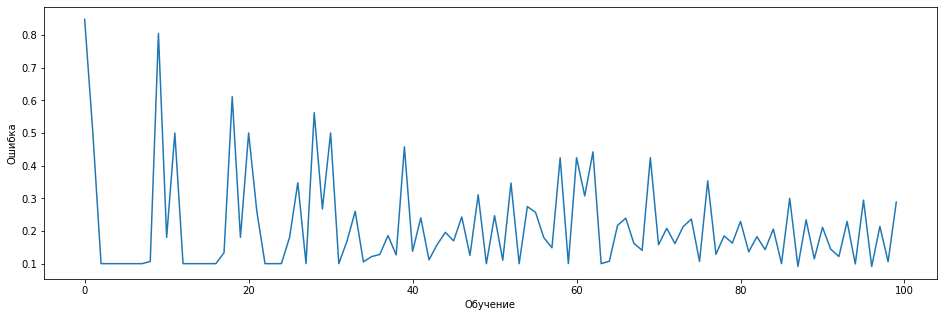

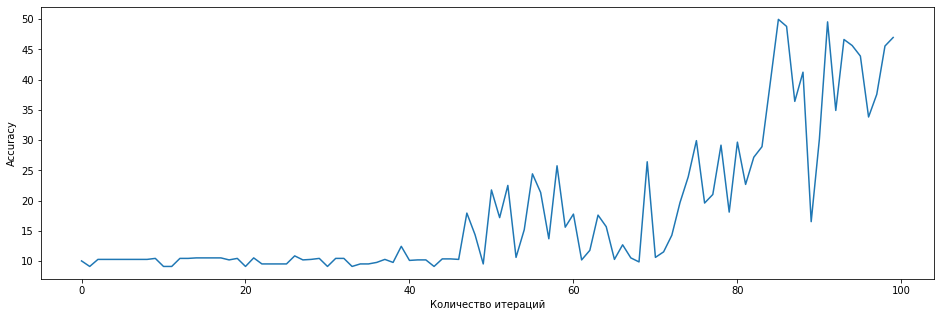

In [53]:
# Демонстрация полученных результатов
# Диаграмма точности в зависимости от обучения
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [54]:
y_train[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

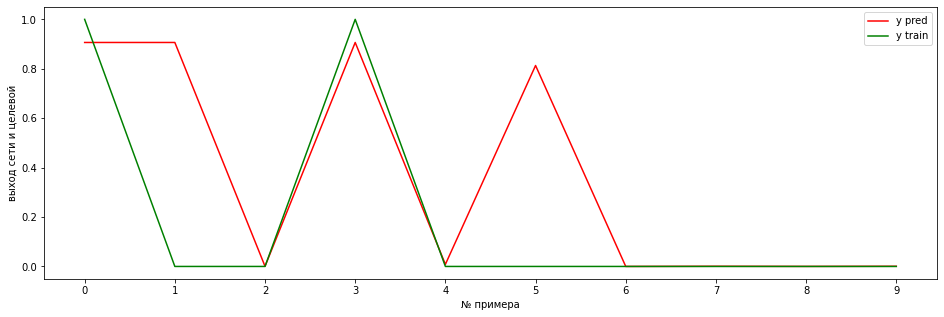

accuracy на обучении 46.97%


In [55]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

print(f"accuracy на обучении {accuracy:.2f}%")

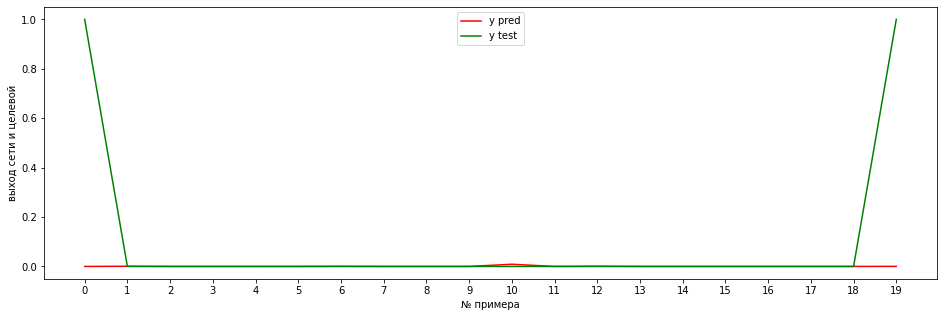

accuracy на тесте 42.26%


In [56]:
# прямое распространение(feed forward)
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))


N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

В этом уроке мы с вами рассматривали, как сделать простые нейронные сети без использования специальных фреймворков и библиотек для этого. В следующих уроках мы с вами познакомимся, как делать нейронные сети с помощью Keras и TensorFlow.

## Домашнее задание <a class='anchor' id='hw'>

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

## Дополнительные материалы

1. [Machine Learning News and Articles](https://medium.com/topic/machine-learning)
2. [Neural Net from scratch](https://towardsai.net/p/machine-learning/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0)
3. [Let’s code a Neural Network in plain NumPy](https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795)
4. [Градиентный спуск на Keras](https://youtu.be/cGKYKla_xSk)
5. [Метод обратного распространения ошибки](https://youtu.be/EuhoXsuu8SQ)

## Используемая литература

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>Глубокое обучение — Николенко С. И., Кадурин 2018</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Asifullah Khan, Anabia Sohail, Umme Zahoora, Aqsa Saeed Qureshi - A Survey of the Recent Architectures of Deep Convolutional Neural Networks 2019</li>
    <li>A direct adaptive method for faster backpropagation learning: the RPROP algorithm - Neural Networks, 1993</li>
    <li>Википедия</li>
    
</ol>

## Определения <a class='anchor' id='def'>

*Общее*

**Узкий (слабый) искусственный интеллект** — это ИИ, который запрограммирован на выполнение одной задачи — будь то мониторинг погоды, игра в шахматы или анализ данных для написания журналистских репортажей.

**Общий (сильный) искусственный интеллект** — этот ИИ схож с человеческим интеллектом, иными словами, он может успешно выполнять любые умственные задачи, которые под силу людям.

**Компьютерное зрение (Computer Vision, CV)** — это область искусственного интеллекта, связанная с анализом изображений и видео.

**Обработка естественного языка (Natural Language Processing, NLP)** — это область искусственного интеллекта, связанная с использованием компьютеров для анализа естественных языков, к которой относятся такие дисциплины, как распознавание и обработка речи, выделение смысловых отношений, категоризация документов, а также аннотирование текста.

___________

*Обучение нейронной сети*

**Искусственный нейрон** — узел искусственной нейронной сети, являющийся упрощённой моделью естественного нейрона.

**Искусственнная нейронная сеть (ИНС)** — это программная реализация математической модели биологической нейронной сети.

**Метод обратного распространения ошибки** — метод вычисления градиента, который используется при обновлении весов нейронной сети.

**Градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента.

**Функция активации нейрона** — функция, определяющая выходной сигнал, который определяется входным сигналом или набором входных сигналов.